In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Lenovo/data/Real estate.csv")
df.columns

Index(['No', 'X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

# Exploratory Data Analysis

In [3]:
df

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,8.1,104.81010,5,24.96674,121.54067,52.5


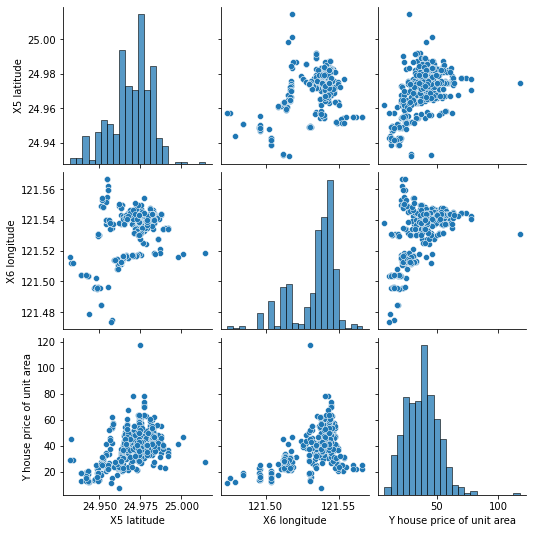

In [4]:
sns.pairplot(df[["X5 latitude","X6 longitude","Y house price of unit area"]])

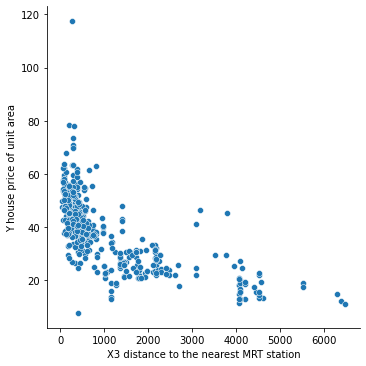

In [5]:
sns.relplot(x="X3 distance to the nearest MRT station",y="Y house price of unit area",data=df,)

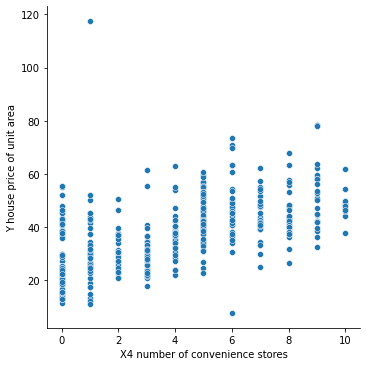

In [6]:
sns.relplot(x="X4 number of convenience stores",y="Y house price of unit area",data=df,)
#This indicates it is a discrete variable



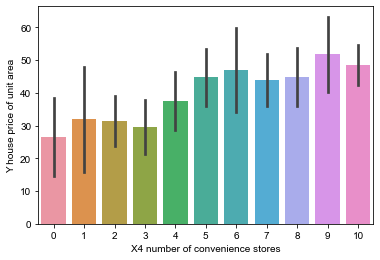

In [7]:
sns.barplot(x="X4 number of convenience stores",y="Y house price of unit area",data=df,ci="sd")
sns.set_style("darkgrid")

(-1.5, 45.0)

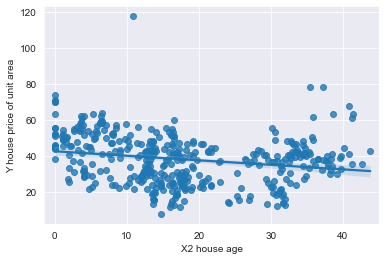

In [8]:
sns.regplot(x="X2 house age",y="Y house price of unit area",data=df)
plt.xlim(-1.5,45)

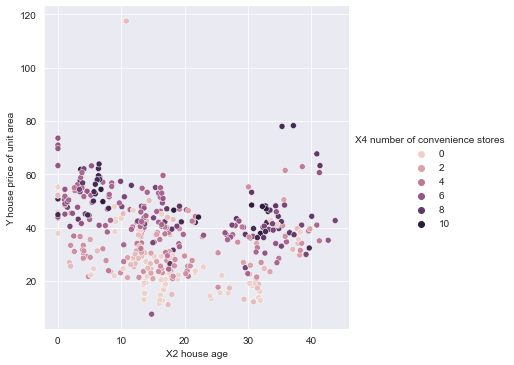

In [9]:
sns.relplot(x="X2 house age",y="Y house price of unit area",hue="X4 number of convenience stores",data=df)

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,8.1,104.81010,5,24.96674,121.54067,52.5


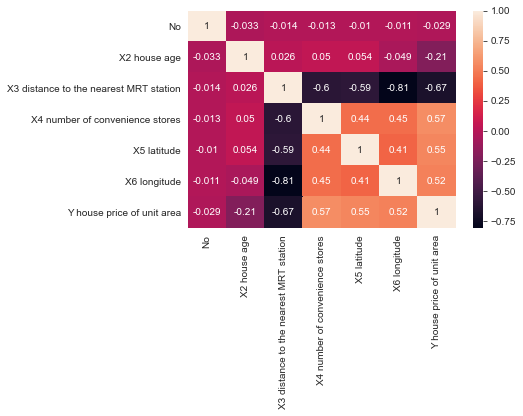

In [10]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)
df.corr()["Y house price of unit area"].sort_values(ascending = False)

df

In [11]:
df.corr()["Y house price of unit area"].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df.columns
X=df[['X4 number of convenience stores', 'X2 house age', 'X3 distance to the nearest MRT station']]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
print(X.columns)
X.values
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

Index(['X4 number of convenience stores', 'X2 house age',
       'X3 distance to the nearest MRT station'],
      dtype='object')
                                  feature       VIF
0         X4 number of convenience stores  2.050093
1                            X2 house age  2.775991
2  X3 distance to the nearest MRT station  1.525476


# Data Pre-processing

In [13]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)


# Model Training

In [14]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',C=100,epsilon=1)
regressor.fit(X_train, y_train)

SVR(C=100, epsilon=1)

In [16]:
y_pred=regressor.predict(X_test)
y_pred=y_pred.reshape(len(y_pred),1)
y_test=y_test.reshape(len(y_test),1)

In [17]:
np.concatenate([y_pred,y_test],axis=1)

array([[27.02809868, 27.3       ],
       [50.9663701 , 54.4       ],
       [25.34258633, 22.        ],
       [18.23349745, 11.6       ],
       [51.13610808, 45.4       ],
       [29.19907522, 23.        ],
       [25.02796303, 21.8       ],
       [39.99209314, 32.2       ],
       [46.4857867 , 37.4       ],
       [14.30062892, 22.6       ],
       [16.07759789, 17.4       ],
       [38.71024316, 36.8       ],
       [22.66776253, 23.1       ],
       [45.48182596, 36.9       ],
       [53.16994314, 56.3       ],
       [24.95563583, 20.9       ],
       [48.45400921, 43.5       ],
       [48.11819804, 40.3       ],
       [22.64588968, 27.7       ],
       [51.29117159, 42.1       ],
       [46.30681532, 46.6       ],
       [23.50658244, 21.8       ],
       [42.63396392, 38.1       ],
       [49.48267781, 53.7       ],
       [52.96474088, 57.1       ],
       [25.06138944, 26.6       ],
       [25.71111645, 32.1       ],
       [50.83480942, 56.8       ],
       [54.56761401,

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7324141651535093

# Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 65.97 %
Standard Deviation: 14.97 %


In [20]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [25, 5, 75, 100], 'kernel': ['linear']},
              {'C': [25, 5, 75, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 65.85 %
Best Parameters: {'C': 25, 'gamma': 0.2, 'kernel': 'rbf'}
